# DATA VIZUALISATION

### WORLD UNEMPLOYMENT DATA 

#### Importing Neccesary Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [6]:
###Read the file and take a first look at the various columns and the values contained therein. Also do check the size of the matrix/dataframe imported that you are going to work on.
df=pd.read_csv('unemployment.csv')
df.head(5)

,Country Name,Country Code,2010,2011,2012,2013,2014
0,Afghanistan,AFG,20.600000,20.900000,19.700001,21.100000,20.799999
1,Angola,AGO,10.800000,10.700000,10.700000,10.600000,10.500000
2,Albania,ALB,25.799999,27.000000,28.299999,28.700001,29.200001
3,Arab World,ARB,25.022214,28.117516,29.113212,29.335306,29.704569
4,United Arab Emirates,ARE,9.800000,9.800000,9.800000,9.900000,10.000000


In [7]:
df.shape

(219, 7)

In [8]:
non_country_list=['Arab World','Central Europe and the Baltics','Caribbean small states','East Asia & Pacific (excluding high income)',
                 'Early-demographic dividend', 'East Asia & Pacific','Europe & Central Asia (excluding high income)',
                 'Europe & Central Asia','Euro area','European Union','Fragile and conflict affected situations','High income',
                 'Heavily indebted poor countries (HIPC)','IBRD only', 'IDA & IBRD total', 'IDA total','IDA blend','IDA only',
                 'Latin America & Caribbean (excluding high income)','Latin America & Caribbean','Least developed countries: UN classification', 
                 'Low income','Lower middle income', 'Low & middle income','Late-demographic dividend','Middle East & North Africa',
                 'Middle income','Middle East & North Africa (excluding high income)','North America','OECD members','Other small states',
                 'Pre-demographic dividend','Post-demographic dividend','South Asia','Sub-Saharan Africa (excluding high income)',
                 'Sub-Saharan Africa','Small states','East Asia & Pacific (IDA & IBRD countries)',
                 'Europe & Central Asia (IDA & IBRD countries)','Latin America & the Caribbean (IDA & IBRD countries)',
                 'Middle East & North Africa (IDA & IBRD countries)','South Asia (IDA & IBRD)',
                 'Sub-Saharan Africa (IDA & IBRD countries)','Upper middle income','World']

In [9]:
df_non_country=df[df['Country Name'].isin(non_country_list)]
df_non_country.head()

,Country Name,Country Code,2010,2011,2012,2013,2014
3,Arab World,ARB,25.022214,28.117516,29.113212,29.335306,29.704569
29,Central Europe and the Baltics,CEB,24.558510,25.480771,26.322471,26.775459,24.326735
40,Caribbean small states,CSS,25.004050,23.858827,25.977574,26.477460,24.596775
48,East Asia & Pacific (excluding high income),EAP,11.001822,10.687960,10.891421,11.511484,11.790579
49,Early-demographic dividend,EAR,14.250746,14.180419,14.328332,14.223181,14.350504


In [10]:
df_non_country.shape

(45, 7)

In [11]:
index=df_non_country.index

In [12]:
df_country=df.drop(index)
df_country.head()

,Country Name,Country Code,2010,2011,2012,2013,2014
0,Afghanistan,AFG,20.600000,20.900000,19.700001,21.100000,20.799999
1,Angola,AGO,10.800000,10.700000,10.700000,10.600000,10.500000
2,Albania,ALB,25.799999,27.000000,28.299999,28.700001,29.200001
4,United Arab Emirates,ARE,9.800000,9.800000,9.800000,9.900000,10.000000
5,Argentina,ARG,19.500000,18.799999,18.400000,19.700001,21.299999


In [13]:
df_country.shape

(174, 7)

### Exploratory Data Analysis 

1.We will begin with an exploratory analysis of the data by making several basic statistical plots such as box plots, scatter plots etc. of the data from individual countries and having a quick glance at how the various countries compare against one another. This first look into the data will reveal several basic information about the data as to the max-min values, the average and median values etc. to name a few.


2.Box Plots:
The box plot of all the individual counteries for the 5 year duration during which the data is collected is shown below.


In [14]:
x_data = ['2010', '2011','2012', '2013','2014']

y0 = df_country['2010']
y1 = df_country['2011']
y2 = df_country['2012']
y3 = df_country['2013']
y4 = df_country['2014']

y_data = [y0,y1,y2,y3,y4]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)',
          'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)']

traces = []

for xd, yd, color in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            whiskerwidth=0.2,
            fillcolor=color,
            marker=dict(
                size=2,
            ),
            boxmean=True,    
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Distribution of Unemployment Data',
    xaxis=dict(
        title='Year'
    ),
    yaxis=dict(
        title='Unemployment Rate (%)',
        autorange=True,
        showgrid=True,
        zeroline=False,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
#       zerolinecolor='rgb(255, 255, 255)',
#       zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)

The box plot along with the scatter data helps us to visualize the data in a better way. From the box plots it can be easily seen that the mean of the data over the years remains almost constant with 18.285 % in 2010 to 18.2546 % in 2014. Aside from that it is readily observed that median in each case is lower than the average suggesting that unemployment in majority of the countries is lower than the average unemployment rate. The median range however varies from 16.05 % (2010) to 14.3 % (2014) peaking in 2010 thus suggesting that overall in majority of the countries the unemployment rate has gone down, though only marginally. Most of the data is in the IQR (Inter Quartile Range) throughout the years that data has been collected with only a small number of cases each year that lie beyond the upper bound suugesting presence of severe unemployment in countries represented by these. These are usually the outliers in the data evidenced from their being small in numbers (out of 174 countries only around 5 of these have unemployment rates outside the upper bound in 2010)

3.Scatter Plots:
Next I am going to have a deeper look into data by making scatter plots from the data where we will be comparing countries such that companies having higher rate of unemployment will have a bigger bubble than the one suffering from a lower unemployment rate. Although the plots have been made for all the years that the data has been collected, discussion will only be done for 2010 and 2014 as similar observations could be made from the other plots.

In [15]:
l=[]
trace0= go.Scatter(
        y= df_country['2010'],
        mode= 'markers',
        name='Unemployment (%)',
        marker= dict(size= df_country['2010'].values,
                    line= dict(width=1),
                    color= df_country['2010'].values,
                    opacity= 0.7,
                    colorscale='Portland',
                    showscale=True),
        text= df_country['Country Name'].values) # The hover text goes here... 
l.append(trace0);

layout= go.Layout(
    title= 'Scatter plot of unemployment rates in 2010',
    hovermode= 'closest',
    xaxis= dict(
#        title= 'Pop',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Unemployment Rate (%)',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False,
)
fig= go.Figure(data=l, layout=layout)
py.iplot(fig)

In [16]:
l1=[]
trace1= go.Scatter(
        y= df_country['2011'],
        mode= 'markers',
        name='Unemployment (%)',
        marker= dict(size= df_country['2011'].values,
                    line= dict(width=1),
                    color= df_country['2011'].values,
                    opacity= 0.7,
                    colorscale='Portland',
                    showscale=True),
        text= df_country['Country Name'].values) # The hover text goes here... 
l1.append(trace1);

layout= go.Layout(
    title= 'Scatter plot of unemployment rates in 2011',
    hovermode= 'closest',
    xaxis= dict(
#        title= 'Pop',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Unemployment Rate (%)',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig= go.Figure(data=l1, layout=layout)
py.iplot(fig,filename='scatter_plot2011')

In [17]:
l2=[]
trace2= go.Scatter(
        y= df_country['2012'],
        mode= 'markers',
        name='Unemployment (%)',
        marker= dict(size= df_country['2012'].values,
                    line= dict(width=1),
                    color= df_country['2012'].values,
                    opacity= 0.7,
                    colorscale='Portland',
                    showscale=True),
        text= df_country['Country Name'].values) # The hover text goes here... 
l2.append(trace2);

layout= go.Layout(
    title= 'Scatter plot of unemployment rates in 2012',
    hovermode= 'closest',
    xaxis= dict(
#        title= 'Pop',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Unemployment Rate (%)',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig= go.Figure(data=l2, layout=layout)
py.iplot(fig,filename='scatter_plot2012')

In [18]:
l3=[]
trace3= go.Scatter(
        y= df_country['2013'],
        mode= 'markers',
        name='Unemployment (%)',
        marker= dict(size= df_country['2013'].values,
                    line= dict(width=1),
                    color= df_country['2013'].values,
                    opacity= 0.7,
                    colorscale='Portland',
                    showscale=True),
        text= df_country['Country Name'].values) # The hover text goes here... 
l3.append(trace3);

layout= go.Layout(
    title= 'Scatter plot of unemployment rates in 2013',
    hovermode= 'closest',
    xaxis= dict(
#        title= 'Pop',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Unemployment Rate (%)',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig= go.Figure(data=l3, layout=layout)
py.iplot(fig,filename='scatter_plot2013')

In [19]:
l4=[]
trace4= go.Scatter(
        y= df_country['2014'],
        mode= 'markers',
        name='Unemployment (%)',
        marker= dict(size= df_country['2014'].values,
                    line= dict(width=1),
                    color= df_country['2014'].values,
                    opacity= 0.7,
                    colorscale='Portland',
                    showscale=True),
        text= df_country['Country Name'].values) # The hover text goes here... 
l4.append(trace4);

layout= go.Layout(
    title= 'Scatter plot of unemployment rates in 2014',
    hovermode= 'closest',
    xaxis= dict(
#        title= 'Pop',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Unemployment Rate (%)',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig= go.Figure(data=l4, layout=layout)
py.iplot(fig,filename='scatter_plot2014')

As evidenced from the scatter plots it is observed that several countries like South Africa, Bosnia and Herzegovina which were already suffering from high unemployment rates in 2010 are still among the countries with highest unemployment rates even in 2014. However, the conditions of some european countries has been going from bad to worse year on year. Greece which was badly hit in the economic slowdown and had to be bailed out by European Union seems to be badly hit by rising unemployment along with Spain and Italy among others. Even from our scatter plots we can see that majority of countries still are in the lower ranges of unemployment suggesting that all is not lost for the youths everywhere

Horizontal Bar Plots-All Countries & Best/Worst Performers :                                           
Merely knowing where each country stood over the years or with respect to each other is not enough. We should also be able to deduce from the data how unemployment has changed over the years in a country. This will tell us how the government's/economies of respective countries have managed the crisis of unemployment looming in their backyard and how they have countered it in shorter term (2 yr periods) and on a longer term (5 year period). To this end 3 additional columns have been added to the data for the accounting the percentage change in a country's unemployment rate from 2010 to 2012, change from 2012 to 2014 and ultimately the change in unemployment from 2010 to 2014.


In [20]:
df_country['2014-2012 change']=df_country['2014']-df_country['2012']
df_country['2012-2010 change']=df_country['2012']-df_country['2010']
df_country.head()

,Country Name,Country Code,2010,2011,2012,2013,2014,2014-2012 change,2012-2010 change
0,Afghanistan,AFG,20.600000,20.900000,19.700001,21.100000,20.799999,1.099998,-0.9
1,Angola,AGO,10.800000,10.700000,10.700000,10.600000,10.500000,-0.200000,-0.1
2,Albania,ALB,25.799999,27.000000,28.299999,28.700001,29.200001,0.900002,2.5
4,United Arab Emirates,ARE,9.800000,9.800000,9.800000,9.900000,10.000000,0.200000,0.0
5,Argentina,ARG,19.500000,18.799999,18.400000,19.700001,21.299999,2.900000,-1.1


In [21]:
# Tried with Plotly now going with seaborn
twoyearchange201412_bar, countries_bar1 = (list(x) for x in zip(*sorted(zip(df_country['2014-2012 change'], df_country['Country Name']), 
                                                             reverse = True)))

twoyearchange201210_bar, countries_bar2 = (list(x) for x in zip(*sorted(zip(df_country['2012-2010 change'], df_country['Country Name']), 
                                                             reverse = True)))


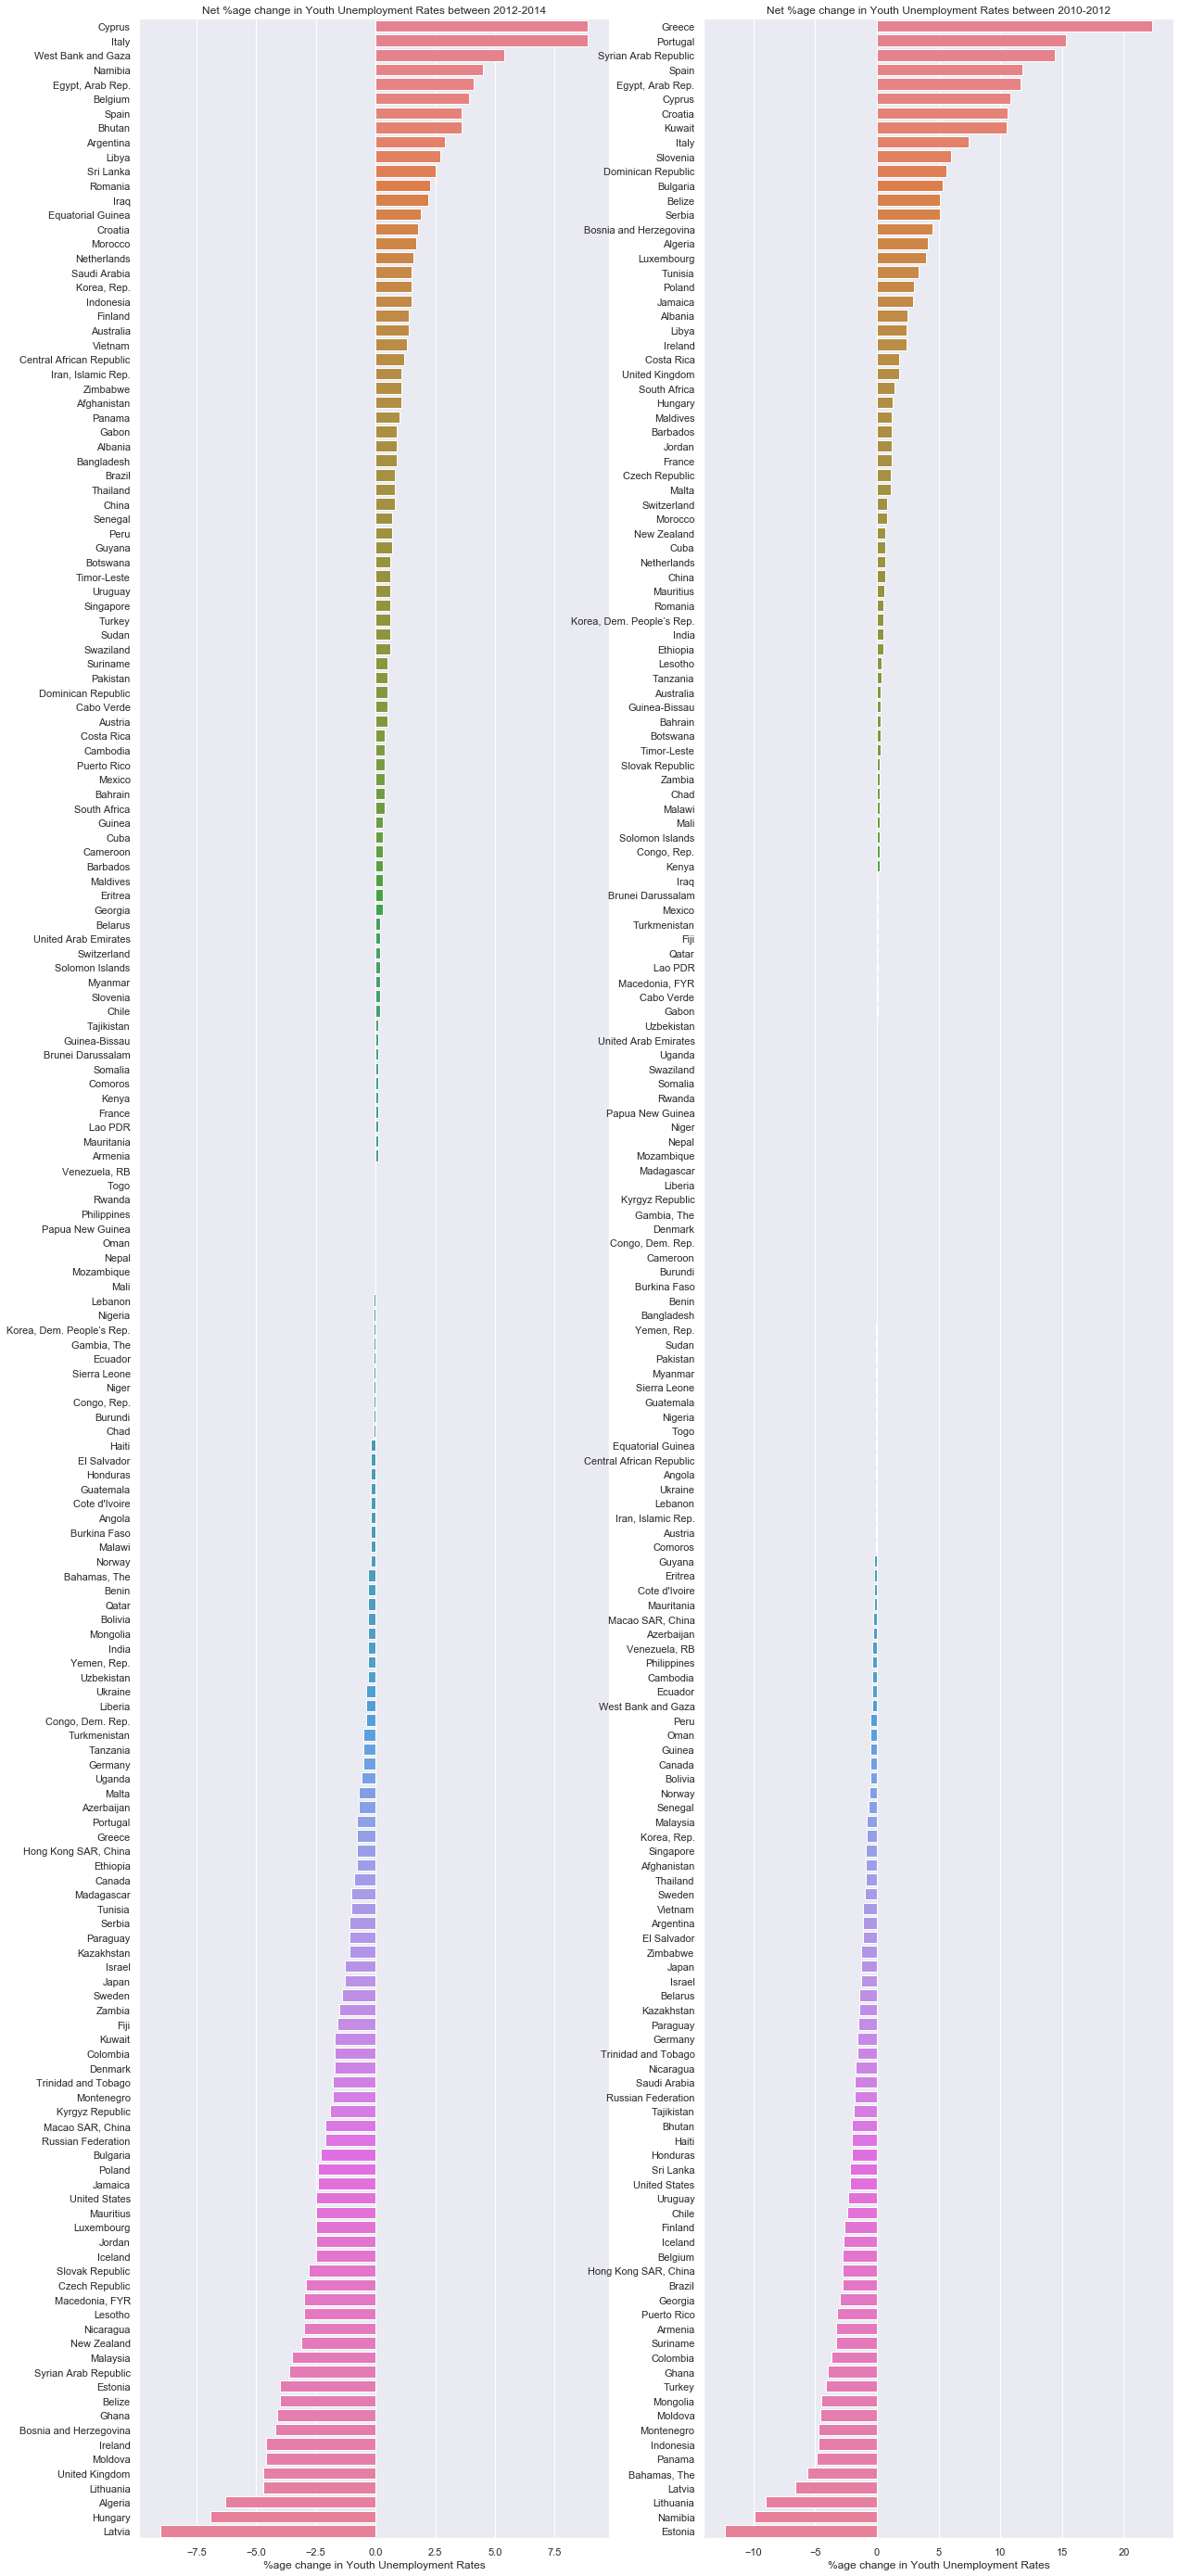

In [22]:
sns.set(font_scale=1) 
fig, axes = plt.subplots(1,2,figsize=(20, 50))
colorspal = sns.color_palette('husl', len(df_country['2014']))
sns.barplot(twoyearchange201412_bar, countries_bar1, palette = colorspal,ax=axes[0])
sns.barplot(twoyearchange201210_bar, countries_bar2, palette = colorspal,ax=axes[1])
axes[0].set(xlabel='%age change in Youth Unemployment Rates', title='Net %age change in Youth Unemployment Rates between 2012-2014')
axes[1].set(xlabel='%age change in Youth Unemployment Rates', title='Net %age change in Youth Unemployment Rates between 2010-2012')
fig.savefig('output.png')

In [23]:
df_country['2014-2010 change']=df_country['2014']-df_country['2010']

In [28]:
def top_successful_1(df,n=10):
    return df.sort_values(by='2014-2010 change',ascending=True).head(n)
def top_failure_1(df,n=10):
    return df.sort_values(by='2014-2010 change',ascending=False).head(n)

In [29]:
top15=top_successful_1(df_country,n=15)
bottom15=top_failure_1(df_country,n=15)

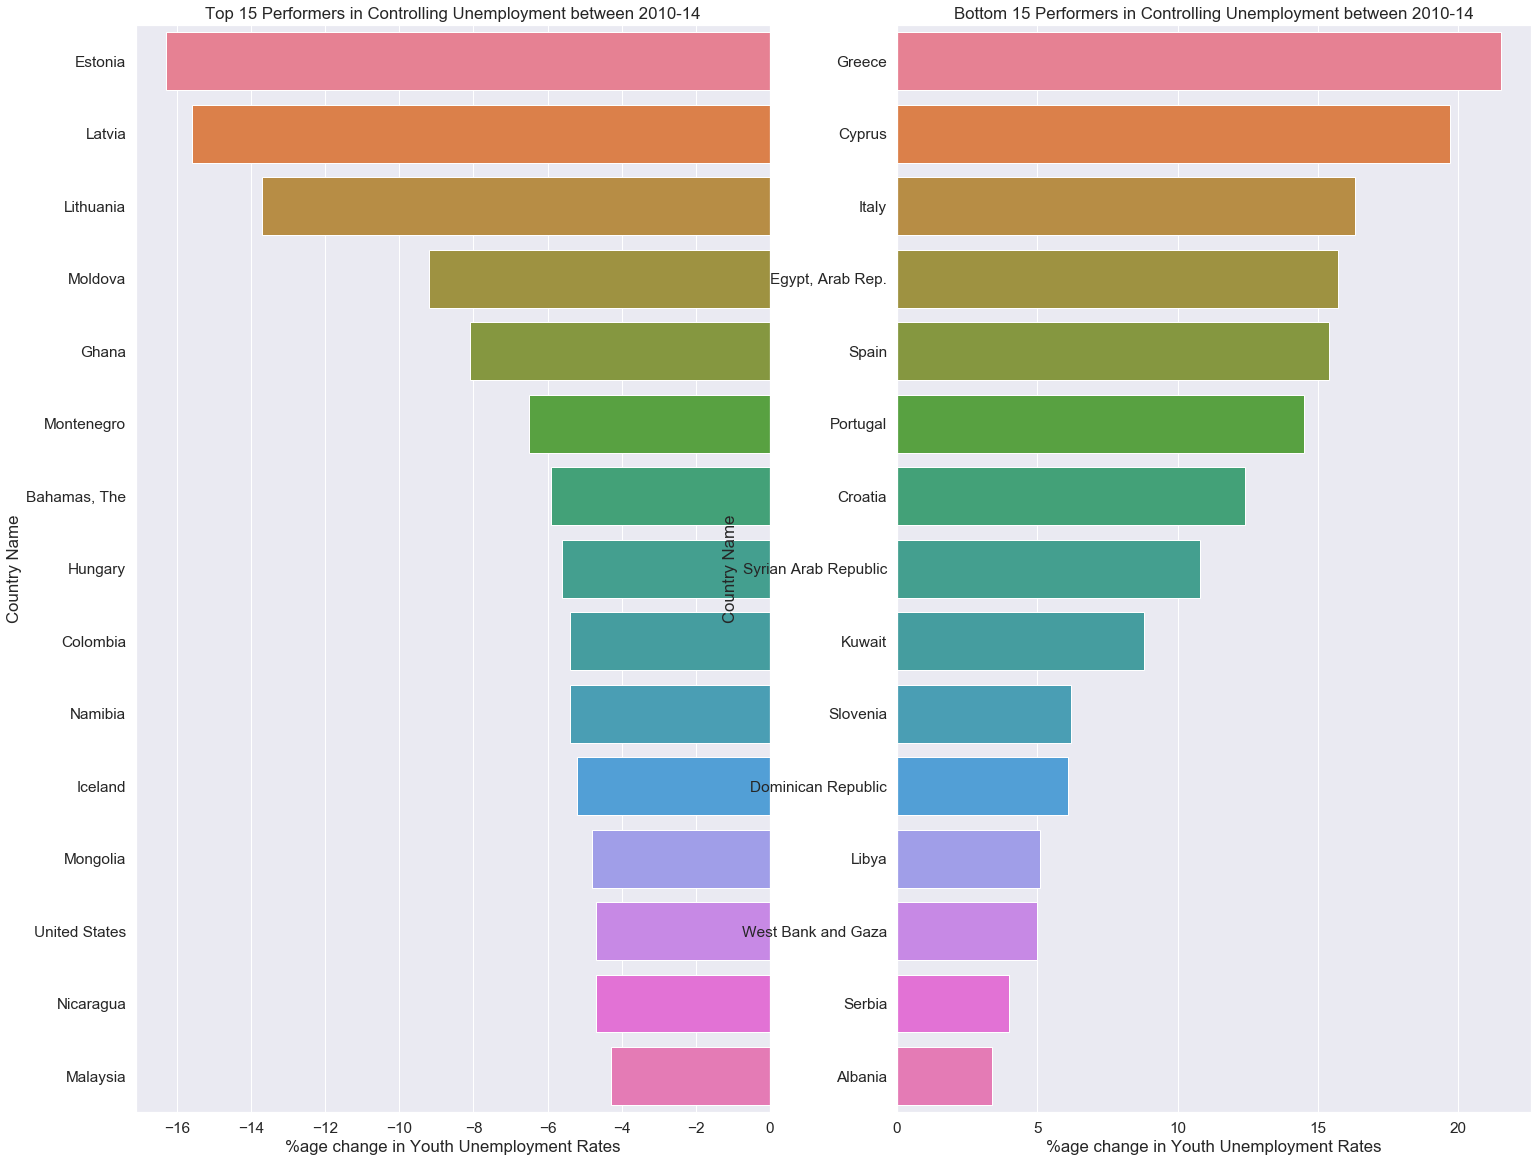

In [30]:
sns.set(font_scale=1.4) 
fig, axes = plt.subplots(1,2,figsize=(25, 20))
colorspal = sns.color_palette('husl', len(top15['2014']))
sns.barplot(top15['2014-2010 change'], top15['Country Name'], palette = colorspal,ax=axes[0])
sns.barplot(bottom15['2014-2010 change'], bottom15['Country Name'], palette = colorspal,ax=axes[1])
axes[0].set(xlabel='%age change in Youth Unemployment Rates', title='Top 15 Performers in Controlling Unemployment between 2010-14')
axes[1].set(xlabel='%age change in Youth Unemployment Rates', title='Bottom 15 Performers in Controlling Unemployment between 2010-14')
fig.savefig('output1.png')

Inferences from Graphs :

Although the net change in unemployment rates over 2 year periods (2010-'12 & 2012-'14) has been plotted for all countries, I am mainly going to keep this discussion focussed on the long term change (2010-'14) and that to on countries which are either most successful or an utter failure in dealing with rising unemployment rates. These long term rates is basically a mirror to the willingness/unwillingness of the particular country's govt. to achieve sustainable growth in employment opportunities to counter the rising unemployment.

Top Successful Countries :

The horizontal bar plot on the left hand side shows the top 15 countries which were most successful in dealing with unemployment in their countries over the period of 2010-14. As can be seen most of these countries are in europe with estonia being the most successful in dealing with unemployment having a negative growth rate of -16.29 % although it's unemployment rate still stood at 17 % which is still higher than most other countries. the top 5 countries are Estonia, Latvia, Lithuania, Moldova and Ghana. A special mention to the unemployment rate in USA which is able to achieve a reduction of about 5 % in it's unemployment rate from 2010-14.

Least Successful Countries :

Here again the list of least successful countries is dominated by european countries with countries like Greece, Spain and Italy reeling under high rates of unemployment among it's people. Most of these european countries have seen a double digit increase in their unemployment rates with situations reaching critical proportions in countries like greece with an unemployment rate of ~54 % in 2014 and spain suffering under a 57 % unemployment rate. All the countries in this list present a state of gloomy future for their youths with the respective authorities unable to rein in the unemployment monster.

Note: A higher value in the top 15 successful and bottom 15 failures in no way suggest that there are aren't other countries where unemployment isn't as dangerous as in these countries. Take for example South africa which was already having an unemployment rate of 50.8 % in 2010 which jumped to 52.6 % in 2014, making their 5 year change a lowly ~3 %, as compared to 22 % increase for greece taking it to 53.9 %. What this bar plots indicate are the countries most capable/ill-equipped to deal with unemployment.


4.Visualization on Maps : 
A picture is worth a thousand words (not sure it was exactly this) cannot be more apt when you can associate the names of places with their location on a map. A map containing all the data is much more visually appealing then rows and rows of endless data. A small effort is made here to present all the possible data on a world map.

In [31]:
# Plotting 2010 World Unemployment Data Geographically
data = [ dict(
        type = 'choropleth',
        locations = df_country['Country Code'],
        z = df_country['2010'],
        text = df_country['Country Name'],
        colorscale = 'Reds',
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Unemployment (%)'),
      ) ]

layout = dict(
    title = 'Unemployment around the globe in 2010',
    geo = dict(
        showframe = True,
        showcoastlines = True,
        showocean = True,
        #oceancolor = 'rgb(0,255,255)',
        oceancolor = 'rgb(222,243,246)',
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False,filename='world2010')

In [33]:
# Plotting 2014 World Unemployment Data Geographically
data = [ dict(
        type = 'choropleth',
        locations = df_country['Country Code'],
        z = df_country['2014'],
        text = df_country['Country Name'],
        colorscale = 'Reds',
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Unemployment (%)'),
      ) ]

layout = dict(
    title = 'Unemployment around the globe in 2014',
    geo = dict(
        showframe = True,
        showcoastlines = True,
        showocean = True,
        #oceancolor = 'rgb(0,255,255)',
        oceancolor = 'rgb(222,243,246)',
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout)
py.iplot( fig, validate=False,filename='world2014')

In [34]:
# Plotting 2010-2014 change World Unemployment Data Geographically
data = [ dict(
        type = 'choropleth',
        locations = df_country['Country Code'],
        z = df_country['2014-2010 change'],
        text = df_country['Country Name'],
        colorscale = 'RdBu',
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Unemployment (%)'),
      ) ]

layout = dict(
    title = 'Net Change in Unemployment around the globe over the 5 year period (2010-14)',
    geo = dict(
        showframe = True,
        showcoastlines = True,
        showocean = True,
        #oceancolor = 'rgb(0,255,255)',
        oceancolor = 'rgb(222,243,246)',
        projection = dict(
            type = 'Mercator'
         )
    )    
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False,filename='WorldChange')

### Conclusion : 

From the above data its clearly seen the percentage change in unemployment increase every years